In [1]:
%cd ..

/media/hdd10tb/yingxic4/SAILERX


In [2]:
import os
import sys
import torch
import numpy as np

from torch.utils.data import Dataset, DataLoader
from ezdict import EZDict
from trainer import PlTrainer
import pandas as pd
import matplotlib.pyplot as plt
import umap
from random import shuffle
import matplotlib
import seaborn as sns
from sknetwork.clustering import Louvain
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, normalized_mutual_info_score, silhouette_score
from sklearn.preprocessing import LabelEncoder

In [5]:
LOAD = 398
NAME = 'main'

args = EZDict({
    "name": f'{NAME}',
    'data_type': 'pbmc10k',
    'train_type': 'multi',
    'log': 'train_log.csv',
    'load_ckpt': f'./models/{NAME}/{LOAD}.pt',
    'cuda_dev': 3, #False
    'sample_batch': False,
    "max_epoch": 220,
    'start_epoch': 1,
    'batch_size': 400,
    'start_save': 90,
    'lr': 1e-4, #dense 1e-3
    'pos_w': 25,
    'weight_decay': 5e-4,
    'optimizer': 'adam',
    'z_dim': 50,
    'out_every': 5,
    'ckpt_dir': './models/',
    'LAMBDA': 1,
    'GAMMA': 6000
})

In [6]:
solver = PlTrainer(args)

Using cuda
Finish loading in 0.45053791999816895, data size (11331, 50) and (11331, 131364)
Loading ./models/main/398.pt
Finished Loading ckpt...


In [7]:
z = solver.encode_latent()
z = z.cpu().numpy()

6it [00:16,  2.68s/it]


In [12]:
labels = solver.dataset.cell_label

In [13]:
reducer = umap.UMAP(random_state=123)
Y_embedded = reducer.fit_transform(z)

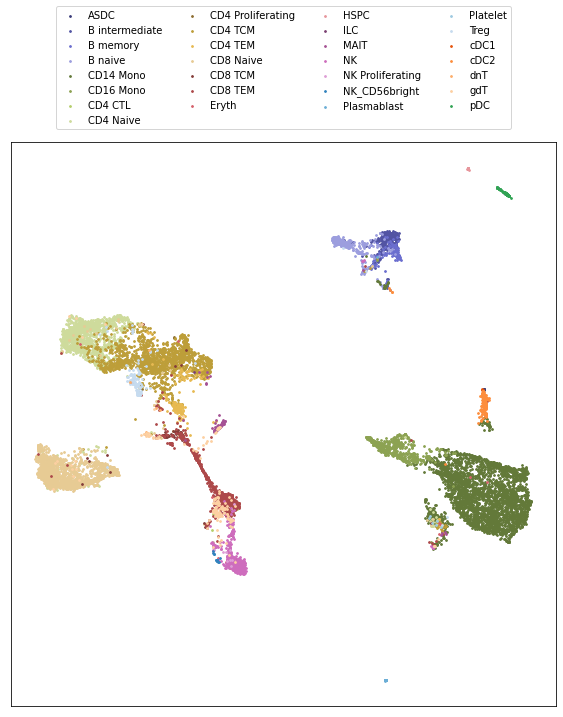

In [31]:
def get_cmap1(n, name='tab20b'):
    return plt.cm.get_cmap(name, n)

def get_cmap2(n, name='tab20c'):
    return plt.cm.get_cmap(name, n)

cmap1 = get_cmap1(20)
cmap2 = get_cmap2(20)

# SAILERX embedding
plt.figure(figsize=(8, 10))
l = np.array(labels)
for i, c in enumerate(np.unique(l)):
    mask = (l == c).flatten()
    if i < 20:
        plt.scatter(Y_embedded[mask, 0], Y_embedded[mask, 1], label=c, s=3, color=cmap1(i))
    else:
        plt.scatter(Y_embedded[mask, 0], Y_embedded[mask, 1], label=c, s=3, color=cmap2(i-20))
plt.xticks([], [])
plt.yticks([], [])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=4, fancybox=True)
plt.tight_layout()

In [69]:
z2 = solver.dataset.pcs
reducer = umap.UMAP(random_state=123)
Y_embedded2 = reducer.fit_transform(z2)

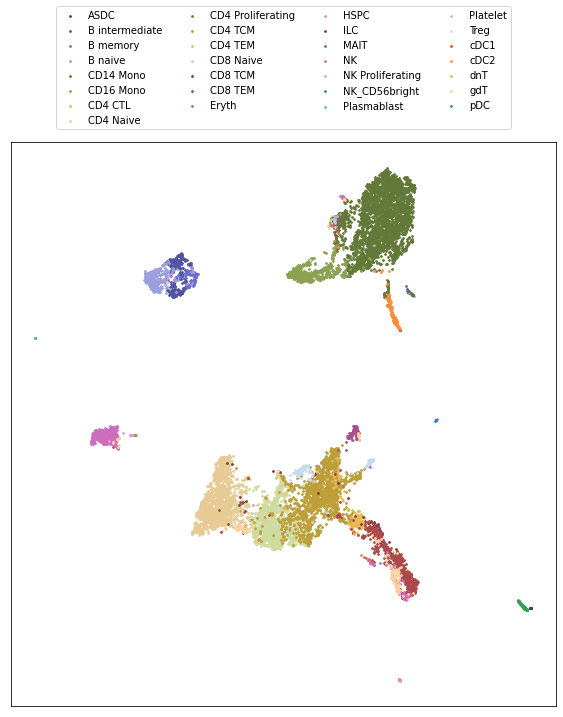

In [70]:
# reference embedding
plt.figure(figsize=(8, 10))
l = np.array(labels)
for i, c in enumerate(np.unique(l)):
    mask = (l == c).flatten()
    if i < 20:
        plt.scatter(Y_embedded2[mask, 0], Y_embedded2[mask, 1], label=c, s=3, color=cmap1(i))
    else:
        plt.scatter(Y_embedded2[mask, 0], Y_embedded2[mask, 1], label=c, s=3, color=cmap2(i-20))
plt.xticks([], [])
plt.yticks([], [])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=4, fancybox=True)
plt.tight_layout()